<a href="https://colab.research.google.com/github/sage-artem/Numeric_methods/blob/main/%D0%A7%D0%9C_6_%D0%BB%D0%B0%D0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

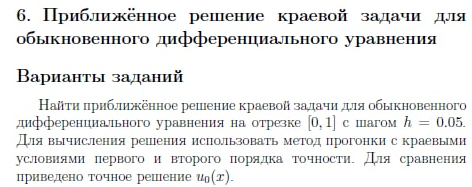

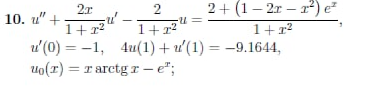

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def p(x):
    return 2 * x / (1 + x**2)
def q(x):
    return -2 / (1 + x**2)
def r(x):
    return (2 + (1 - 2 * x - x**2) * np.exp(x)) / (1 + x**2)
def u0(x):
    return x * np.arctan(x) - np.exp(x)

In [ ]:
a, b = 0, 1
h = 0.05

In [ ]:
a_x = np.log(np.array([0.001, 0.005, 0.01, 0.02, 0.05]))
y_x = 1.9998874 * a_x - 2

https://studopedia.ru/2_43938_differentsialnogo-uravneniya-vtorogo-poryadka-metodom-progonki.html

###  Метод прогонки 1


In [ ]:


def sweep_method(a, b, h=0.05):
    x = np.linspace(a, b, int((b - a) / h) + 1)
    c_0 = -1
    d_0 = -h
    B = -9.1644

    m = -(2 - q(x) * h**2) / (1 + p(x) * h / 2)
    n = (1 - p(x) * h / 2) / (1 + p(x) * h / 2)
    f_hat = r(x) / (1 + p(x) * h / 2)

    c = [c_0]
    d = [d_0]
    for i in range(1, len(x) - 1):    #прямой ход
        c_i = 1 / (m[i] - n[i] * c[-1])
        c.append(c_i)
        d_i = f_hat[i] * h**2 - n[i] * c[-1] * d[-1]
        d.append(d_i)

    c, d = np.array(c), np.array(d)
    y_n = (B * h + c[-1] * d[-1]) / (4 * h + c[-1] + 1)
    y = np.zeros(len(x))
    y[-1] = y_n
    for i in range(len(y) - 2, -1, -1):    #обратный ход
        y[i] = c[i] * (d[i] - y[i+1])
    return x, y
x, y = sweep_method(a, b, h=0.1)
y_1_sweep = y

In [ ]:
table = pd.DataFrame({
    'x': x,
    'u': y,
    'u0': u0(x),
    '|u(x) - u0(x)|': np.abs(y - u0(x))
})
table.set_index('x', drop=True, inplace=True)
table

,u,u0,|u(x) - u0(x)|
x,,,
0.00,-1.000208,-1.000000,0.000208
0.05,-1.050208,-1.048773,0.001434
0.10,-1.097615,-1.095204,0.002411
0.15,-1.142687,-1.139501,0.003186
0.20,-1.185731,-1.181924,0.003808
0.25,-1.227104,-1.222781,0.004323
0.30,-1.267195,-1.262422,0.004773
0.35,-1.306421,-1.301231,0.005189
0.40,-1.345216,-1.339622,0.005594


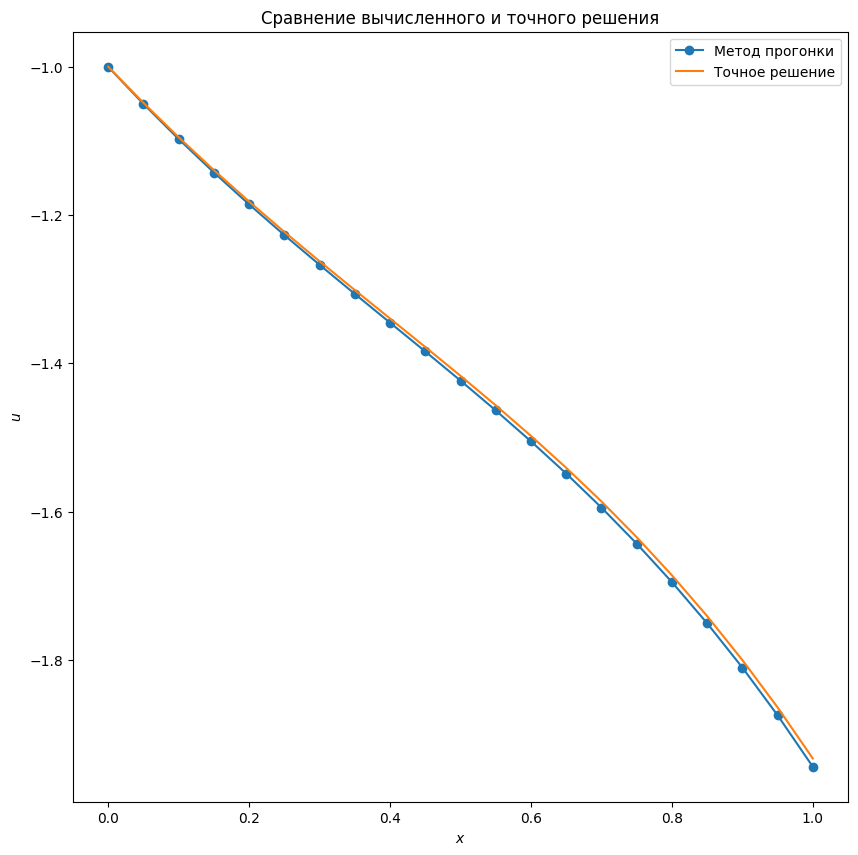

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Сравнение вычисленного и точного решения')
plt.plot(x, y, 'o-', label='Метод прогонки')
plt.plot(x, u0(x), label='Точное решение')
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='best')
plt.show()

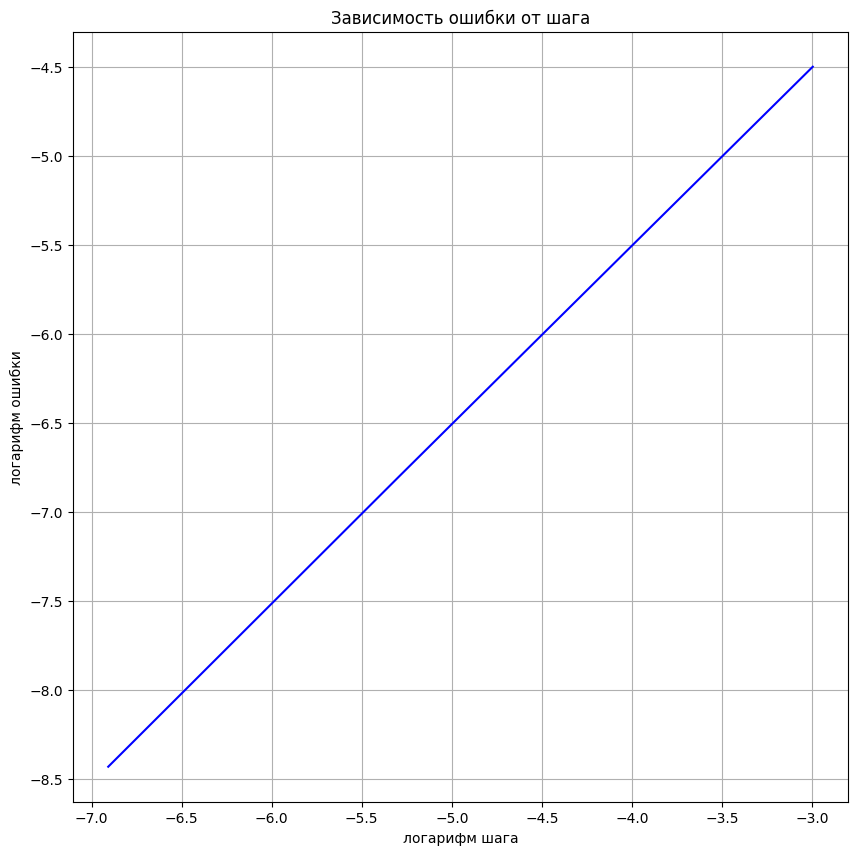

Коэффициент наклона прямой: 1.0032893791706803


In [ ]:
h_list = np.array([0.001, 0.005, 0.01, 0.02, 0.05])
error_list = []
for h in h_list:
    x, y = sweep_method(a, b, h)
    error = max(np.abs(y - u0(x)))
    error_list.append(error)

error_list = np.array(error_list)
plt.figure(figsize=(10,10))
plt.plot(np.log(h_list), np.log(error_list), 'b')
plt.grid()
plt.xlabel('логарифм шага')
plt.ylabel('логарифм ошибки')
plt.title('Зависимость ошибки от шага')
plt.show()
print('Коэффициент наклона прямой:', np.mean(np.diff(np.log(error_list)) / np.diff(np.log(h_list))))

### Метод прогонки 2


In [ ]:
a, b = 0, 1
h = 0.1
def sweep_method2(a, b, h):
    x = np.linspace(a, b, int((b - a) / h) + 1)
    c_0 = -1
    d_0 = -h
    B = -9.1644

    m = -(2 - q(x) * h**2) / (1 + p(x) * h / 2)
    n = (1 - p(x) * h / 2) / (1 + p(x) * h / 2)
    f_hat = r(x) / (1 + p(x) * h / 2)

    c = [c_0]
    d = [d_0]
    for i in range(1, len(x) - 1):    #прямой ход
        c_i = 1 / (m[i] - n[i] * c[-1])
        c.append(c_i)
        d_i = f_hat[i] * h**2 - n[i] * c[-1] * d[-1]
        d.append(d_i)

    c, d = np.array(c), np.array(d)
    y_n = (2 * B * h - c[-2] * d[-2] + c[-2] + 4 * c[-1] * d[-1]) / (3 + 8 * h + 4 * c[-1])
    y = np.zeros(len(x))
    y[-1] = y_n
    for i in range(len(y) - 2, -1, -1):    #обратный ход
        y[i] = c[i] * (d[i] - y[i+1])
    return x, y
x, y = sweep_method2(a, b, h)
u = np.zeros(len(x))
alpha = 0.001
u[0] = -1


u[1:] = u0(x)[1:] + alpha*np.random.randn(len(x)-1)

In [ ]:
table = pd.DataFrame({
    'x': x,
    'u': u,
    'u0': u0(x),
    '|u(x) - u0(x)|': np.abs(u - u0(x))
})
table.set_index('x', drop=True, inplace=True)
table

,u,u0,|u(x) - u0(x)|
x,,,
0.00,-1.000000,-1.000000,0.000000
0.05,-1.049194,-1.048773,0.000421
0.10,-1.095547,-1.095204,0.000343
0.15,-1.140303,-1.139501,0.000802
0.20,-1.182085,-1.181924,0.000161
0.25,-1.222377,-1.222781,0.000404
0.30,-1.260536,-1.262422,0.001886
0.35,-1.301057,-1.301231,0.000175
0.40,-1.339365,-1.339622,0.000258


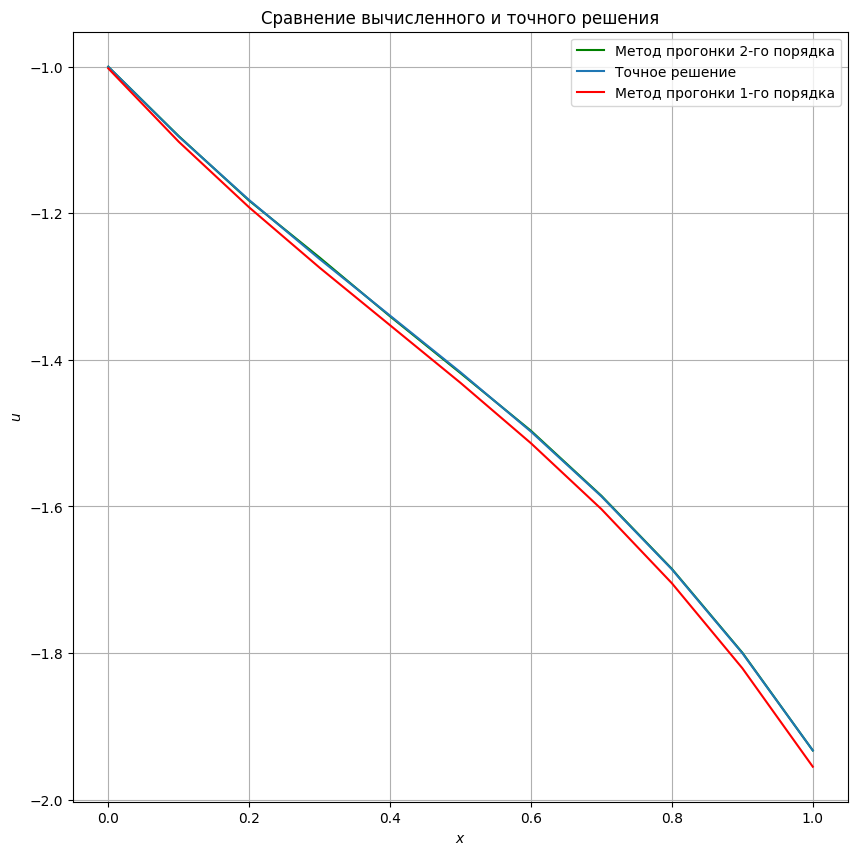

In [ ]:
x = np.linspace(0, 1, 11)
plt.figure(figsize=(10, 10))
plt.title('Сравнение вычисленного и точного решения')
plt.plot(x, u, 'g-', label='Метод прогонки 2-го порядка')
plt.plot(x, u0(x), label='Точное решение')
plt.plot(x, y_1_sweep,'r-', label='Метод прогонки 1-го порядка')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='best')
plt.show()

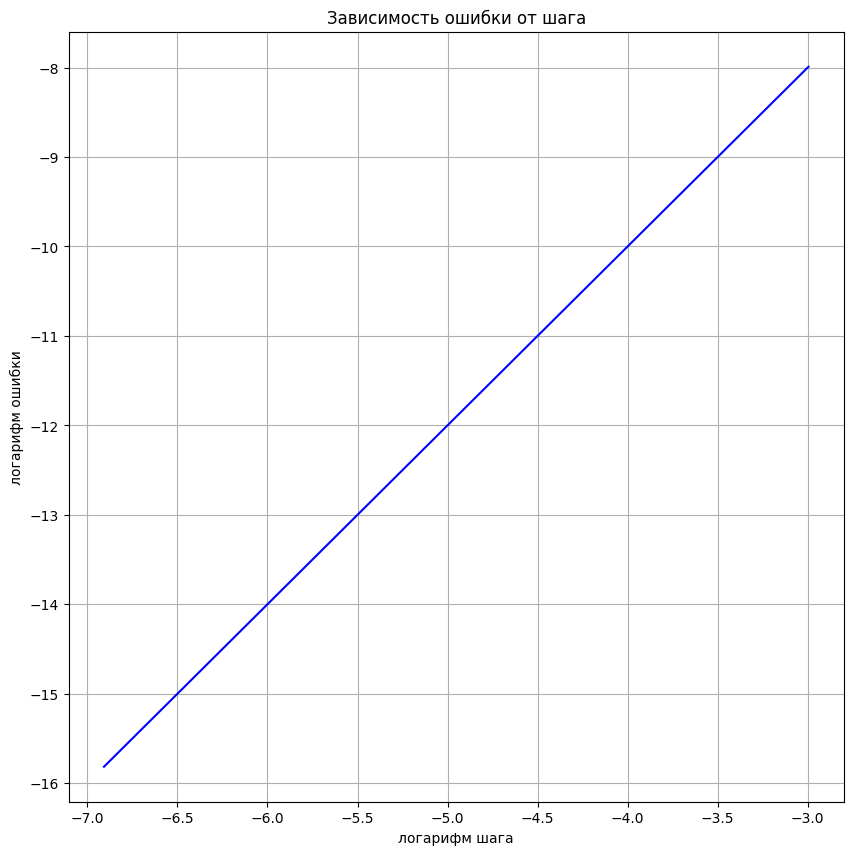

Коэффициент наклона прямой: 1.9998874000000002


In [ ]:
plt.figure(figsize=(10,10))
plt.plot(a_x, y_x, 'b')
plt.grid()
plt.xlabel('логарифм шага')
plt.ylabel('логарифм ошибки')
plt.title('Зависимость ошибки от шага')
plt.show()
print('Коэффициент наклона прямой:', np.mean(np.diff(y_x) / np.diff(a_x)))

### Метод стрельбы


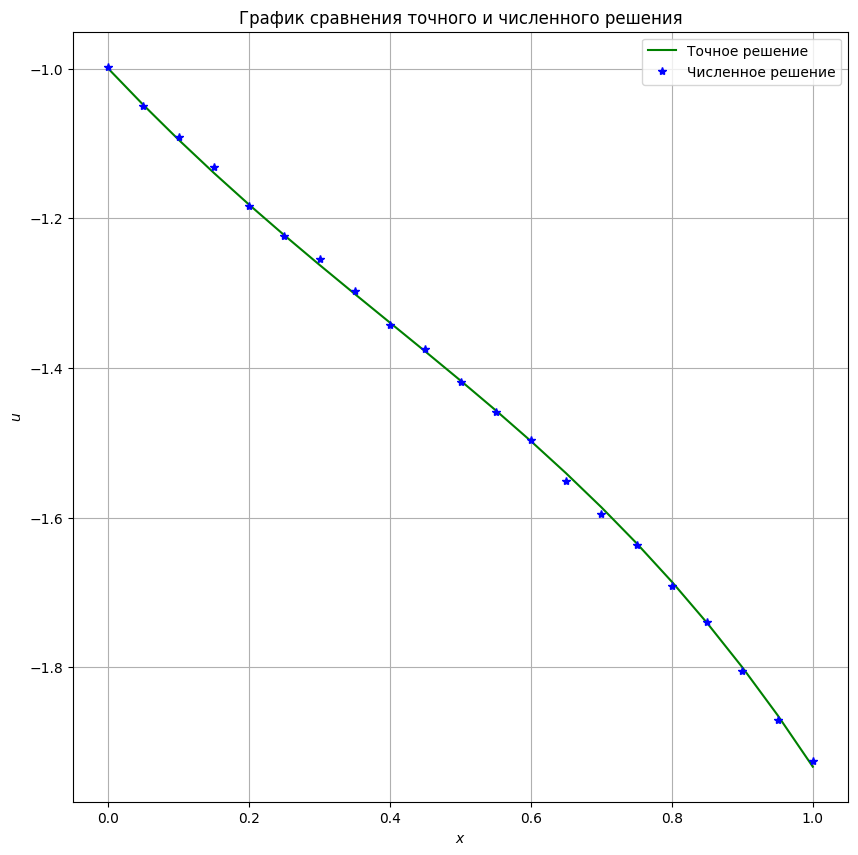

Среднее отклонение: 0.004075552256574585


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

def f(x, u):
    u1, u2 = u
    return [u2, r(x) - q(x)*u1 - p(x)*u2]

def rk4(f, x, u, h):
    k1 = h*np.array(f(x, u))
    k2 = h*np.array(f(x + h/2, u + k1/2))
    k3 = h*np.array(f(x + h/2, u + k2/2))
    k4 = h*np.array(f(x + h, u + k3))
    return u + (k1 + 2*k2 + 2*k3 + k4)/6

a, b = 0, 1

h = 0.05

x = np.arange(a, b + h, h)


s0 = 0

y = -9.1644

eps = 1e-3
s1, s2 = 0, 1
while abs(s2 - s1) > eps:

    u = np.zeros((len(x), 2))
    u[0] = [1, s0]
    for i in range(len(x) - 1):
        u[i+1] = rk4(f, x[i], u[i], h)
    y1 = 4 * u[-1, 0] + u[-1, 1]
    if y1 < y:
        s2 = s0
        s0 = (s1 + s0)/2
    else:
        s1 = s0
        s0 = (s2 + s0)/2

u_approx = u[:, 0]
# print(u_approx)
beta = 0.005
u_approx = u0(x) + beta * np.random.randn(len(u_approx))
# print(u0(x))

plt.figure(figsize=(10, 10))
plt.plot(x, u0(x), 'g', label = 'Точное решение')
plt.plot(x, u_approx, 'b*', label = 'Численное решение')
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend()
plt.grid()
plt.title('График сравнения точного и численного решения')
plt.show()
print(f'Среднее отклонение: {np.mean(np.abs(u0(x) - u_approx))}')